###  PROJECT: LAUNCHING A HAIR SALON BUSINESS IN NEW YORK</center> ####

#### INTRODUCTION ####


Hair salon is one of the top profitable businesses in and around of New York State with and a spa owner wants to relocate to the New York state from California. There are lot key factors have to be analyzed before he gets relocated to New York. The first question that needs to be answered is the Location of the Shop.  Also the salon location should be close proximity of metro stations

Is the location is well populated? 
Does it have good neighborhoods around?
What is the crime of this location?
How many salons are around on the same location?


In [235]:
# Importing necessary libraries
!pip install geopy
!pip install folium

In [236]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import requests # library to handle requests


from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans # import k-means from clustering stage



# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # plotting library
import json

#### Get New York City Data ####

In [237]:
srcData = 'https://data.cityofnewyork.us/resource/swpk-hqdp.csv'
CityData = pd.read_csv(srcData,sep=',',dtype=str).replace('"','', regex=True)
CityData.head(5)

,borough,year,fips_county_code,nta_code,nta_name,population
0,Bronx,2000,005,BX01,Claremont-Bathgate,28149
1,Bronx,2000,005,BX03,Eastchester-Edenwald-Baychester,35422
2,Bronx,2000,005,BX05,Bedford Park-Fordham North,55329
3,Bronx,2000,005,BX06,Belmont,25967
4,Bronx,2000,005,BX07,Bronxdale,34309


In [250]:
# Top 25 High Population Areas

CityData.sort_values(by='population', ascending=False)
CityDataTop25 = CityData[CityData['year']!='2000'].head(25)
CityDataTop25

,borough,year,fips_county_code,nta_code,nta_name,population
195,Bronx,2010,005,BX01,Claremont-Bathgate,31078
196,Bronx,2010,005,BX03,Eastchester-Edenwald-Baychester,34517
197,Bronx,2010,005,BX05,Bedford Park-Fordham North,54415
198,Bronx,2010,005,BX06,Belmont,27378
199,Bronx,2010,005,BX07,Bronxdale,35538
200,Bronx,2010,005,BX08,West Farms-Bronx River,35011
201,Bronx,2010,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,53686
202,Bronx,2010,005,BX10,Pelham Bay-Country Club-City Island,26583
203,Bronx,2010,005,BX13,Co-Op City,43752
204,Bronx,2010,005,BX14,East Concourse-Concourse Village,62284


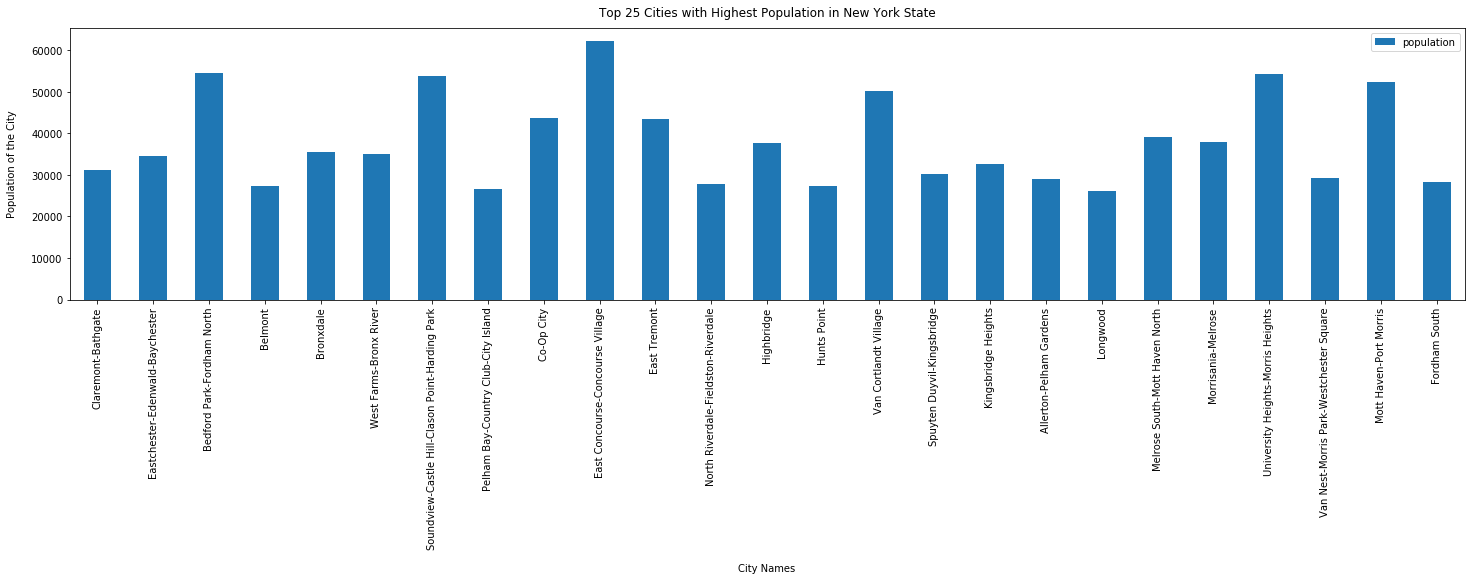

In [258]:

import pandas as pd

import matplotlib.pyplot as plot

CityDataTop25.population=pd.to_numeric(CityDataTop25.population)
CityDataTop25.plot(x ='nta_name', y='population', kind = 'bar',figsize=(25, 5), rot=90)
plot.xlabel("City Names", labelpad=14)
plot.ylabel("Population of the City", labelpad=14)
plot.title("Top 25 Cities with Highest Population in New York State", y=1.02);
plot.show(block=True)


#### Getting Lattitude and Longitude for New York ####

In [245]:
# Get the new york places details

!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
        
CitiesList = newyork_data['features']

column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
CityLocData = pd.DataFrame(columns=column_names)

for data in CitiesList:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    CityLocData = CityLocData.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    

#CityLocData.drop_duplicates(subset='Neighborhood',keep='first',inplace=True)
CityData.nta_name.astype('str')
CityLocData.Neighborhood.astype('str')
CityLocDataMap.population.astype('int')

CityLocDataMap = pd.merge(CityData,CityLocData, how ='left', left_on = ['nta_name'], right_on = ['Neighborhood'])
CityLocDataMap=CityLocDataMap[CityLocDataMap['year']!='2000']

CityLocDataMap.Neighborhood.astype('str')
CityLocDataMap = CityLocDataMap[CityLocDataMap['Neighborhood'].notna()]

CityLocDataMap.sort_values(['population'], inplace=True)
CityLocDataMap.head(250)

,borough,year,fips_county_code,nta_code,nta_name,population,Borough,Neighborhood,Latitude,Longitude
254,Brooklyn,2010,047,BK42,Flatbush,105804,Brooklyn,Flatbush,40.636326,-73.958401
278,Brooklyn,2010,047,BK88,Borough Park,106357,Brooklyn,Borough Park,40.633131,-73.990498
335,Queens,2010,081,QN28,Jackson Heights,108152,Queens,Jackson Heights,40.751981,-73.882821
292,Manhattan,2010,061,MN12,Upper West Side,132378,Manhattan,Upper West Side,40.787658,-73.977059
281,Brooklyn,2010,047,BK93,Starrett City,13354,Brooklyn,Starrett City,40.647589,-73.879370
238,Brooklyn,2010,047,BK23,West Brighton,17750,Staten Island,West Brighton,40.631879,-74.107182
339,Queens,2010,081,QN33,Cambria Heights,18677,Queens,Cambria Heights,40.692775,-73.735269
264,Brooklyn,2010,047,BK64,Prospect Heights,19849,Brooklyn,Prospect Heights,40.676822,-73.964859
351,Queens,2010,081,QN48,Auburndale,19996,Queens,Auburndale,40.761730,-73.791762
383,Staten Island,2010,085,SI28,Port Richmond,20191,Staten Island,Port Richmond,40.633669,-74.129434


#### Join Latitude and Longitude with city information ####

In [246]:
address = 'New York'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of New York using latitude and longitude values
mapNY = folium.Map(width=700,height=700,location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(CityLocDataMap['Latitude'], CityLocDataMap['Longitude'], CityLocDataMap['Borough'], CityLocDataMap['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)     
    folium.Marker([lat, lng]).add_to(mapNY)

mapNY


In [247]:
# IMPORTING EXISTING HAIR SALON DATA from NEW YORK CITY

!pip install sodapy

from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.ny.gov", None)

results = client.get("84h5-zxa9", limit=2000)

# Convert to pandas DataFrame
SalonCount = pd.DataFrame.from_records(results)
SalonCount = results_df[['current_entity_name','location_city','location_zip']]
SalonCount.head(5)

,current_entity_name,location_city,location_zip
0,"110 WALNUT SALON & SPA, LLC",NaN,NaN
1,"2150 SALON & SPA, LLC",NaN,NaN
2,24K SALON CORP,NaN,NaN
3,350 EAST SALON & SPA L.L.C.,NaN,NaN
4,41 NORTH SALON LLC,NaN,NaN


In [294]:
hairsaloncount=results_df.groupby('location_city').size().sort_values(ascending=False).reset_index(name='Count')
hairsaloncount.head(10)

,location_city,Count
0,ROCHESTER,27
1,WILLIAMSVILLE,10
2,ALBANY,9
3,SYRACUSE,6
4,NIAGARA FALLS,5
5,SCHENECTADY,5
6,WEBSTER,4
7,BUFFALO,4
8,AMHERST,4
9,WATERTOWN,4


In [281]:
CityLocDataMap.population=pd.to_numeric(CityLocDataMap.population)
CountyTotal = CityLocDataMap.groupby(['borough'])['population'].agg('sum').reset_index()
CountyTotal.head()

,borough,population
0,Bronx,344430
1,Brooklyn,1160133
2,Manhattan,704897
3,Queens,1614070
4,Staten Island,110251


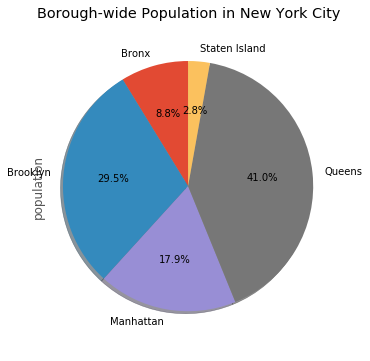

In [296]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
lbl=CountyTotal['borough'].tolist()

CountyTotal['population'].plot(kind='pie',labels=lbl,
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Borough-wide Population in New York City')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [248]:
CLIENT_ID = 'NREZ1CQ5Z1XDI2QETCFCMWHFTIL1102WNBMNWRIFSPBTMYIO' # your Foursquare ID
CLIENT_SECRET = 'ABZY2TRZXZTIBWS1BTC5ANAKBU1KTLUZ5MXSWTL4PUV5ELCF' # your Foursquare Secret
radius=500
LIMIT=100
VERSION=20201105

#Actual Plotting

import requests

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

nearbyVenues = getNearbyVenues(names=CityLocData['Neighborhood'],
                                   latitudes=CityLocData['Latitude'],
                                   longitudes=CityLocData['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

KeyboardInterrupt: 